# Advanced Pairs Trading : Kalman Filters

## Import library

In [1]:
import sys
sys.path.append('../../')

In [2]:
from util.load_data import *
from config.constants import *
import statsmodels.api as sm
import quantstats as qs
import numpy as np
from pykalman import KalmanFilter
import pandas as pd
import matplotlib.pyplot as plt
from Kalman_Filter import Kalman_Filter

## Getting the Data

In [3]:
XAUUSD = load_data()

## Class Kalman Filter

## Currency_Pair

In [4]:
Currency_Pair = 'EURUSD'

## TF D1

In [5]:
TF = 'D1'

In [6]:
data_1 = XAUUSD[TF]

In [7]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

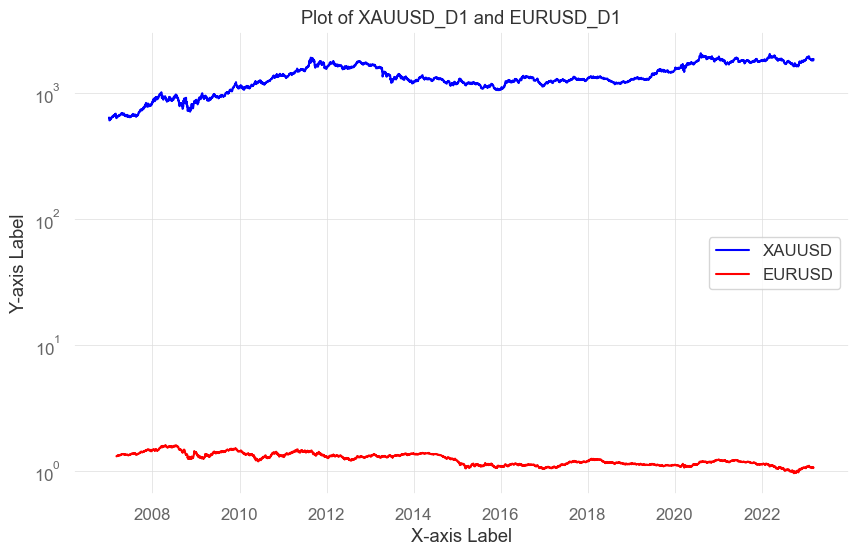

In [8]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label='XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [9]:
KF = Kalman_Filter(data_1, data_2)

In [10]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                          5.210e+04
Date:                Sat, 02 Mar 2024   Prob (F-statistic):                        0.00
Time:                        17:36:27   Log-Likelihood:                         -37285.
No. Observations:                5012   AIC:                                  7.457e+04
Df Residuals:                    5011   BIC:                                  7.458e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1061.7711      4.652    228.253      0.000    1052.652    1070.890
==============================================================================
Omnibus:                      156.936   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.290
Skew:                          -0.267   Prob(JB):                     2.51e-25
Kurtosis:                       2.492   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
result = KF.Run()

### Save Result Backtest 

In [12]:
result
data = result[['strategy', 'stock1_signal', 'stock2_signal']].copy()

In [13]:
filename = f'{Currency_Pair}_{TF}.csv'

In [14]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-05
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -99.99%
CAGR﹪                     -34.61%

Sharpe                     -1.33
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -1.12
Sortino                    -1.39
Smart Sortino              -1.17
Sortino/√2                 -0.98
Smart Sortino/√2           -0.83
Omega                      0.63

Max Drawdown               -100.0%
Longest DD Days            5736
Volatility (ann.)          32.72%
Calmar                     -0.35
Skew                       -8.05
Kurtosis                   79.32

Expected Daily %           -0.2%
Expected Monthly %         -4.98%
Expected Yearly %          -44.01%
Kelly Criterion            -28.62%
Risk of Ruin               0.0%
Daily Value-at-Risk        -3.56%
Expected Shortfall (cVaR)  -3.56%

Max Consecu

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-06-27,2019-06-19,2023-03-10,5736,-99.996410,-99.996070
2,2007-03-06,2007-04-16,2007-06-25,112,-5.418505,-5.195312


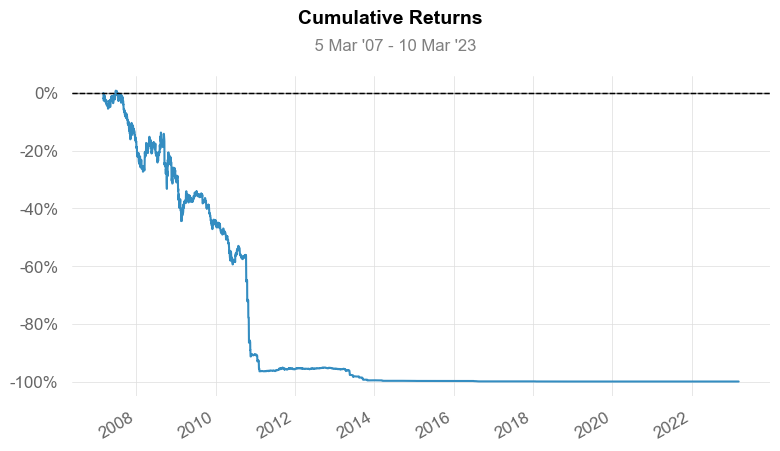

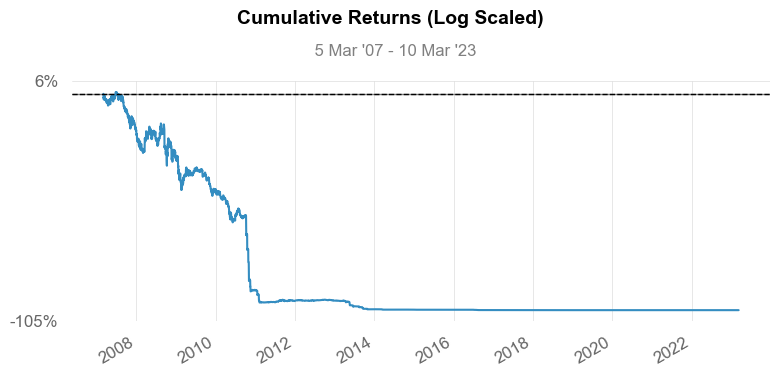

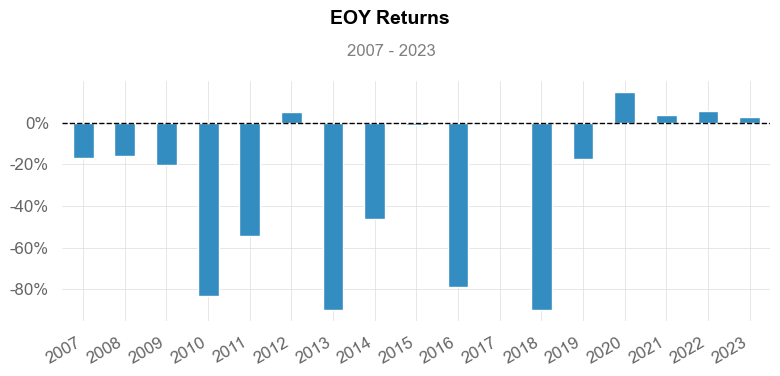

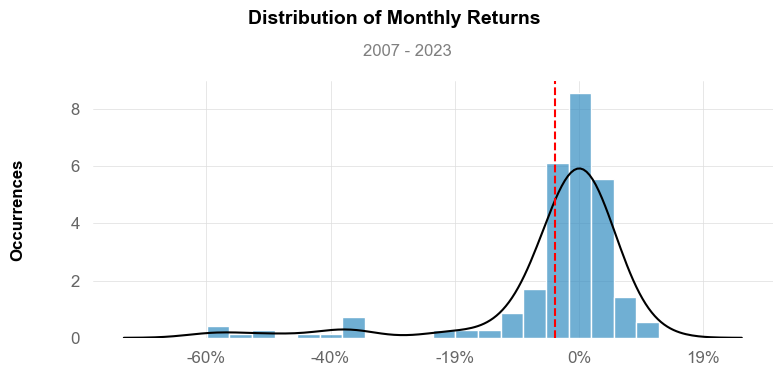

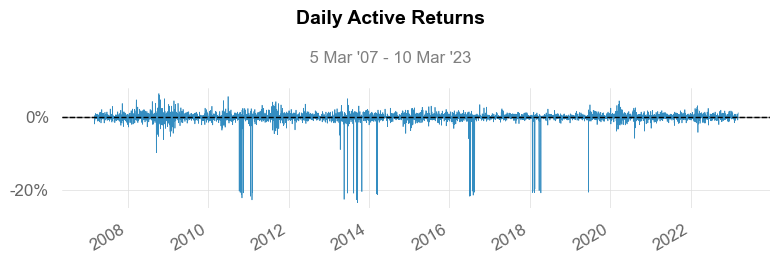

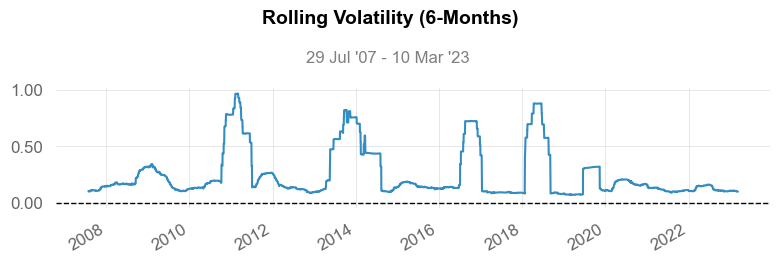

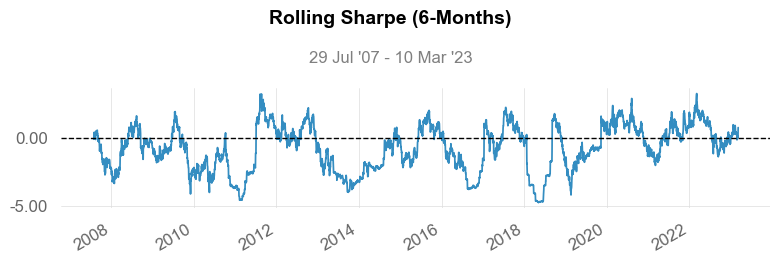

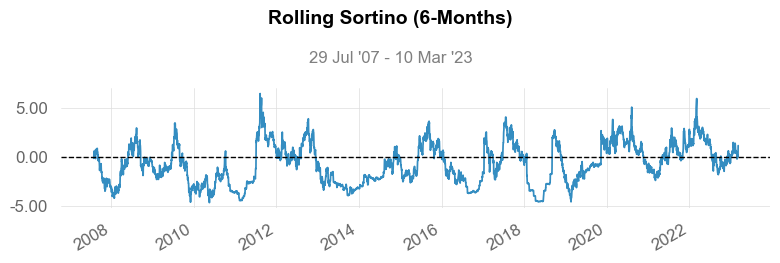

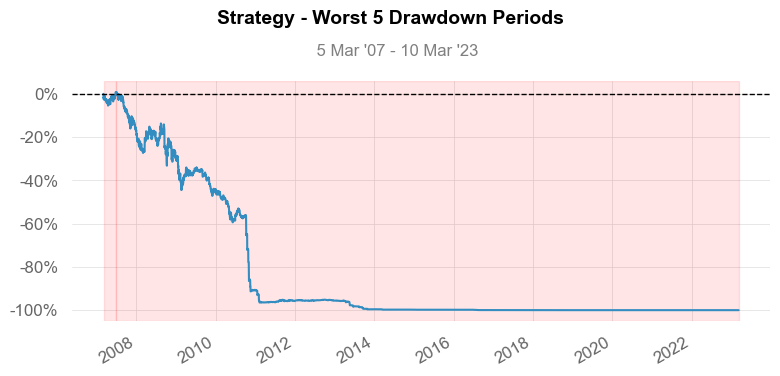

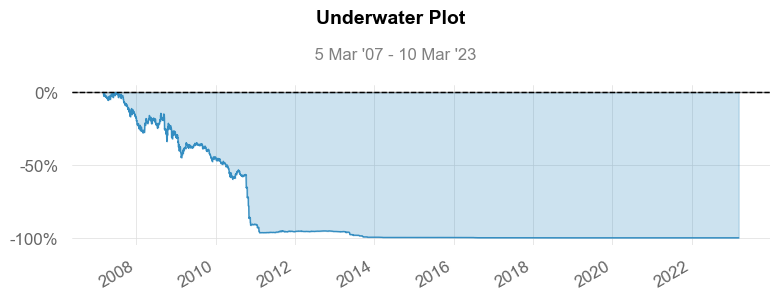

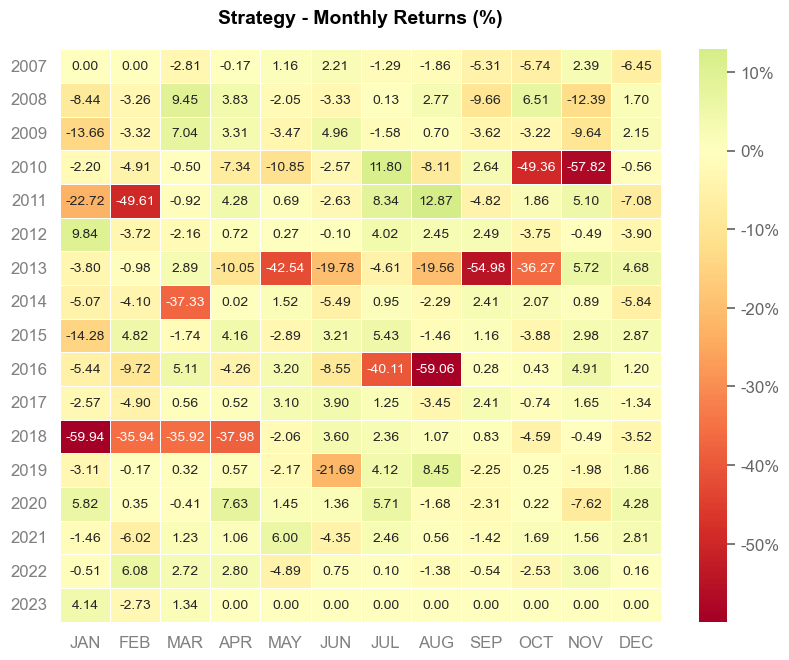

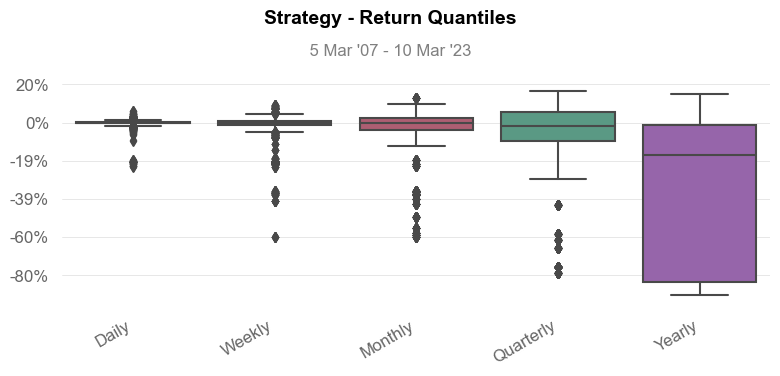

In [15]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())

## TF H4

In [16]:
TF = 'H4'

In [17]:
data_1 = XAUUSD[TF]

In [18]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

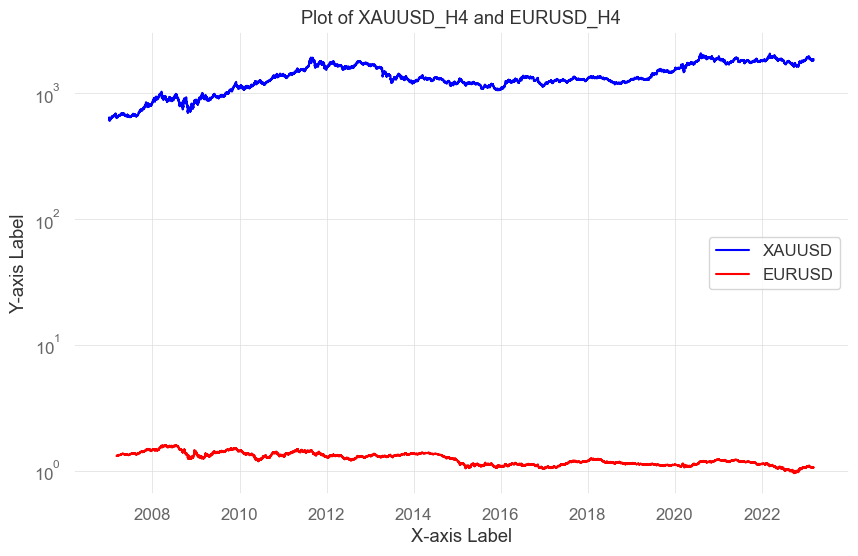

In [19]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label='XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [20]:
KF = Kalman_Filter(data_1, data_2)

In [21]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                          2.684e+05
Date:                Sat, 02 Mar 2024   Prob (F-statistic):                        0.00
Time:                        17:37:11   Log-Likelihood:                     -1.9228e+05
No. Observations:               25846   AIC:                                  3.846e+05
Df Residuals:                   25845   BIC:                                  3.846e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1061.5297      2.049    518.027      0.000    1057.513    1065.546
==============================================================================
Omnibus:                      822.303   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              588.395
Skew:                          -0.267   Prob(JB):                    1.70e-128
Kurtosis:                       2.489   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
result = KF.Run()

### Save Result Backtest 

In [23]:
result
data = result[['strategy', 'stock1_signal', 'stock2_signal']].copy()

In [24]:
filename = f'{Currency_Pair}_{TF}.csv'

In [25]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-05
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -98.02%
CAGR﹪                     -15.54%

Sharpe                     -0.96
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -0.86
Sortino                    -0.97
Smart Sortino              -0.86
Sortino/√2                 -0.69
Smart Sortino/√2           -0.61
Omega                      0.51

Max Drawdown               -98.49%
Longest DD Days            5587
Volatility (ann.)          18.47%
Calmar                     -0.16
Skew                       -16.45
Kurtosis                   281.6

Expected Daily %           -0.08%
Expected Monthly %         -2.01%
Expected Yearly %          -20.59%
Kelly Criterion            -48.35%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.98%
Expected Shortfall (cVaR)  -1.98%

Max Conse

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-11-23,2019-06-05,2023-03-10,5587,-98.491094,-98.477267
2,2007-03-08,2007-06-20,2007-08-17,163,-2.967887,-2.892966
3,2007-10-16,2007-11-08,2007-11-11,27,-1.209739,-1.115991
4,2007-11-16,2007-11-18,2007-11-20,5,-0.514447,-0.376940
5,2007-09-21,2007-09-25,2007-09-26,6,-0.289748,-0.208108


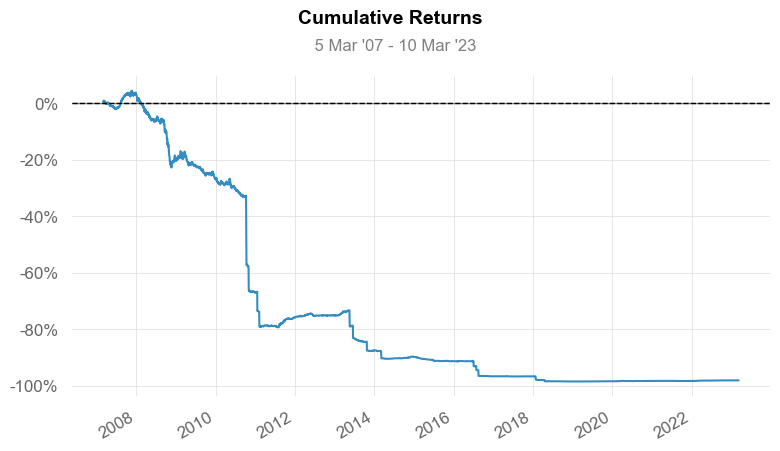

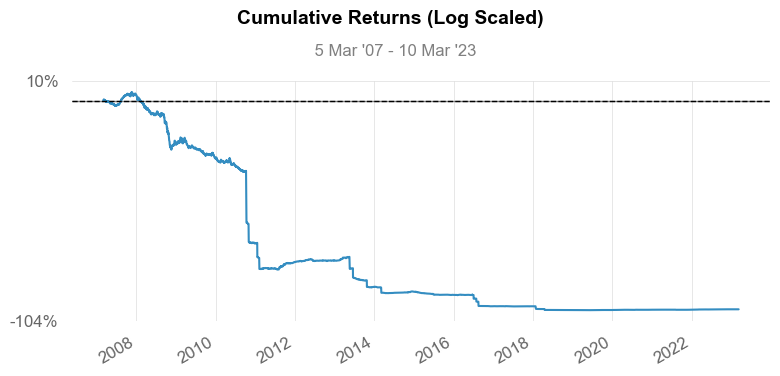

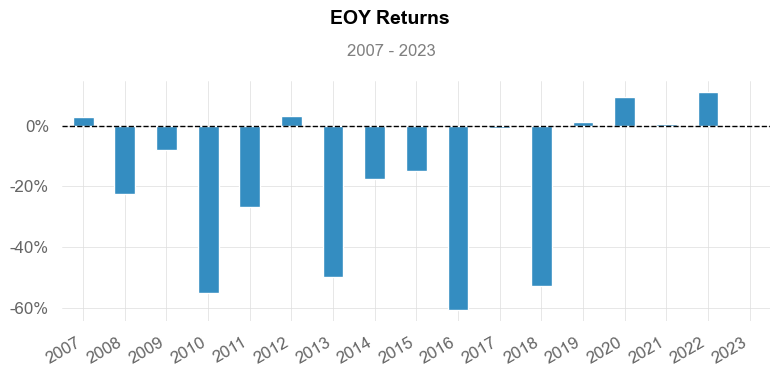

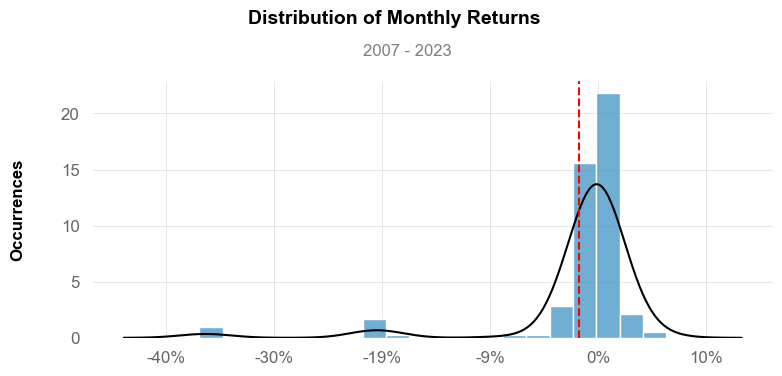

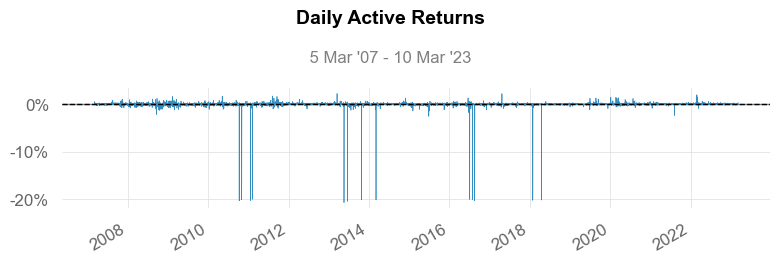

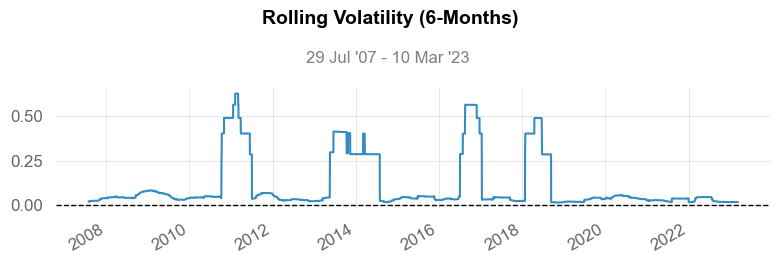

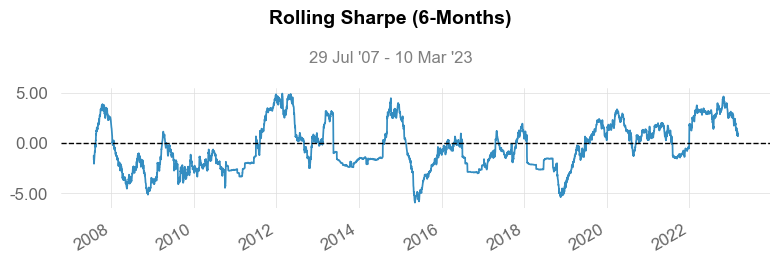

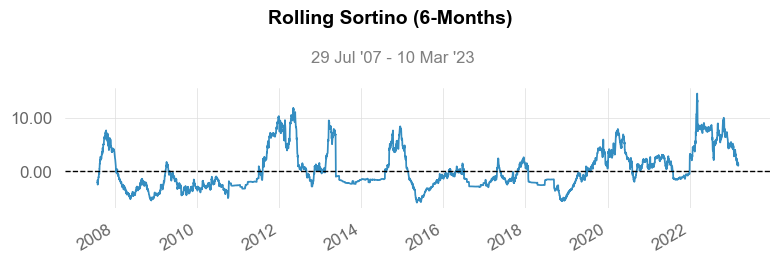

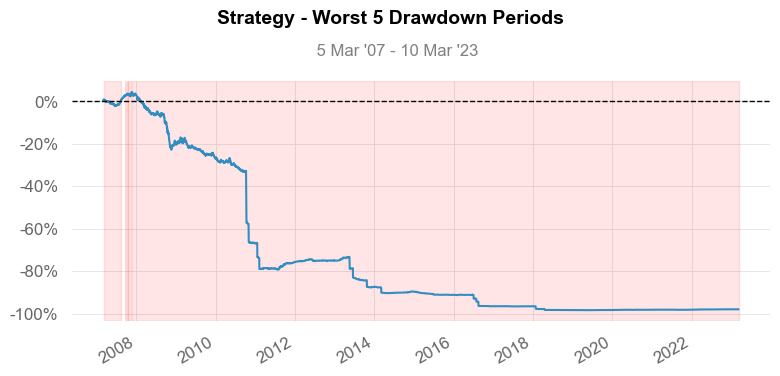

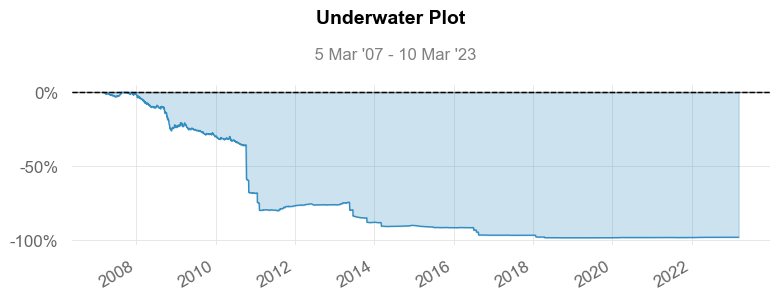

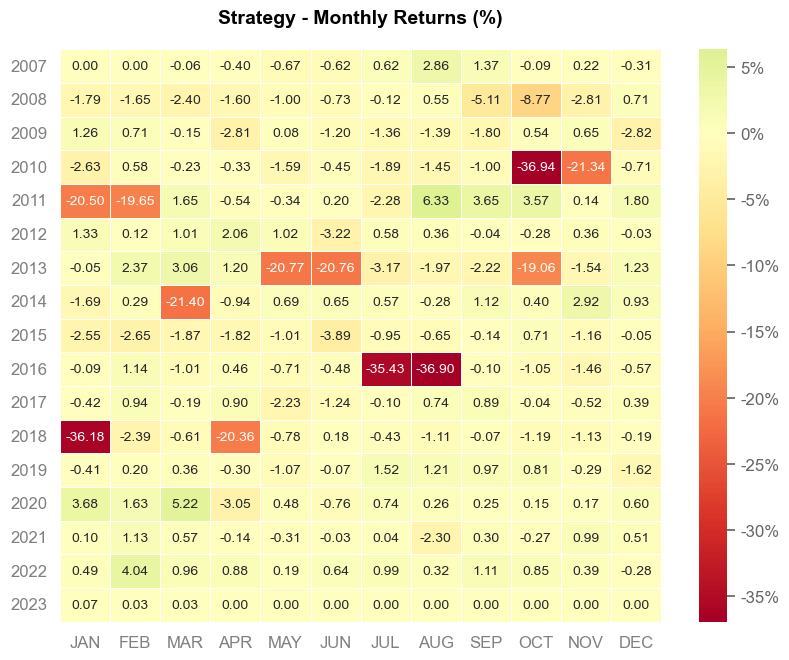

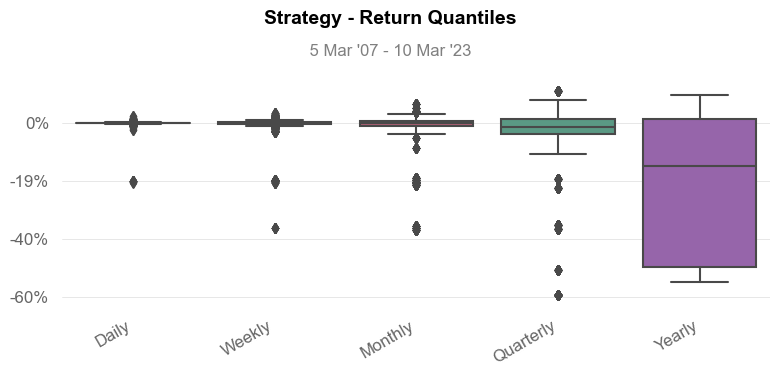

In [26]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())

## TF H1

In [27]:
TF = 'H1'

In [28]:
data_1 = XAUUSD[TF]

In [29]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

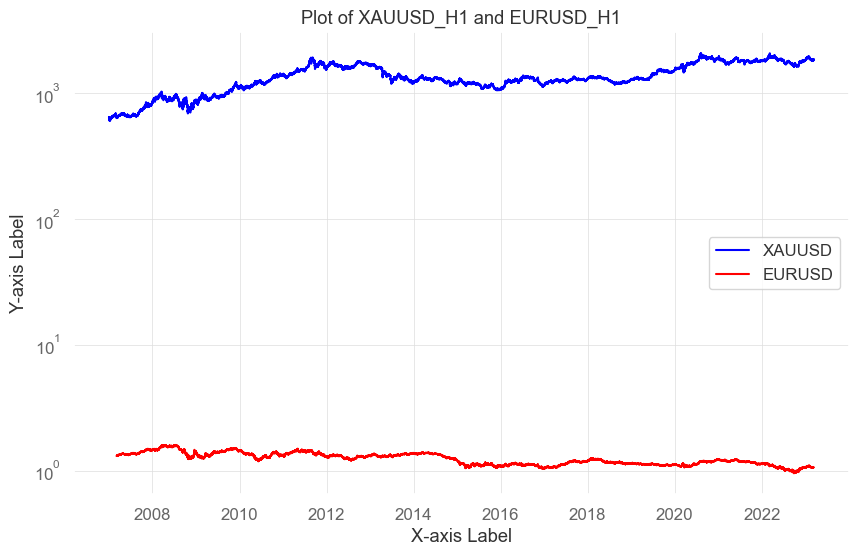

In [30]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label='XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [31]:
KF = Kalman_Filter(data_1, data_2)

In [32]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                          1.038e+06
Date:                Sat, 02 Mar 2024   Prob (F-statistic):                        0.00
Time:                        17:39:55   Log-Likelihood:                     -7.4403e+05
No. Observations:              100009   AIC:                                  1.488e+06
Df Residuals:                  100008   BIC:                                  1.488e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1061.4561      1.042   1018.928      0.000    1059.414    1063.498
==============================================================================
Omnibus:                     3188.955   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2278.527
Skew:                          -0.267   Prob(JB):                         0.00
Kurtosis:                       2.489   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
result = KF.Run()

### Save Result Backtest 

In [34]:
result
data = result[['strategy', 'stock1_signal', 'stock2_signal']].copy()

In [35]:
filename = f'{Currency_Pair}_{TF}.csv'

In [36]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-05
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -79.6%
CAGR﹪                     -6.62%

Sharpe                     -0.58
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -0.51
Sortino                    -0.59
Smart Sortino              -0.51
Sortino/√2                 -0.42
Smart Sortino/√2           -0.36
Omega                      0.65

Max Drawdown               -85.81%
Longest DD Days            5587
Volatility (ann.)          12.2%
Calmar                     -0.08
Skew                       -24.79
Kurtosis                   644.35

Expected Daily %           -0.03%
Expected Monthly %         -0.82%
Expected Yearly %          -8.93%
Kelly Criterion            -26.7%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.29%
Expected Shortfall (cVaR)  -1.29%

Max Consecuti

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-11-23,2019-06-03,2023-03-10,5587,-85.809987,-85.754056
2,2007-03-28,2007-07-06,2007-08-17,143,-1.905643,-1.795231
3,2007-09-20,2007-10-18,2007-11-11,53,-0.622108,-0.606177
4,2007-09-07,2007-09-16,2007-09-17,11,-0.434827,-0.378738
5,2007-11-18,2007-11-18,2007-11-21,4,-0.426284,-0.195378


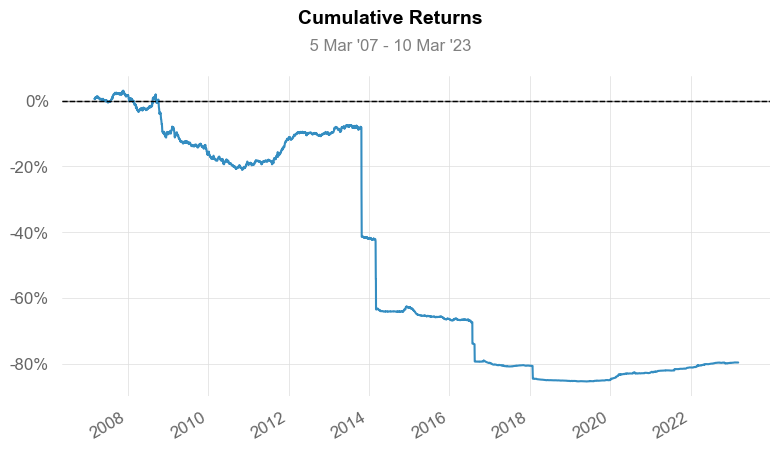

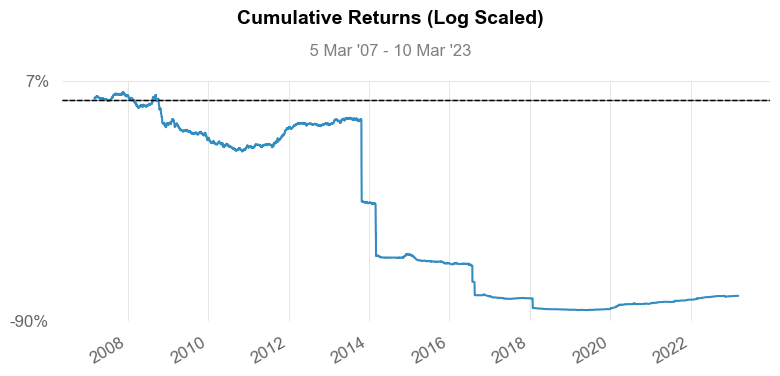

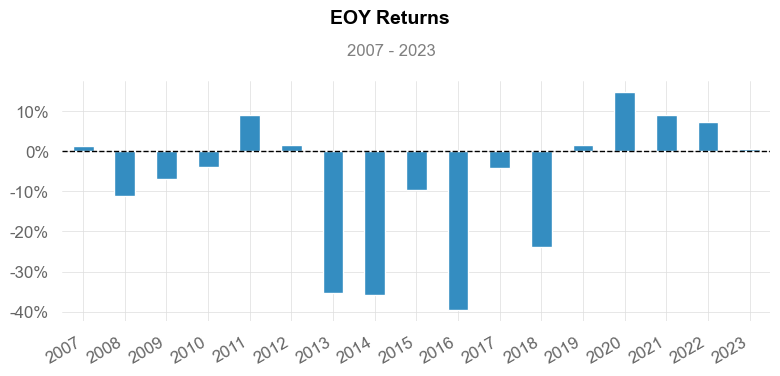

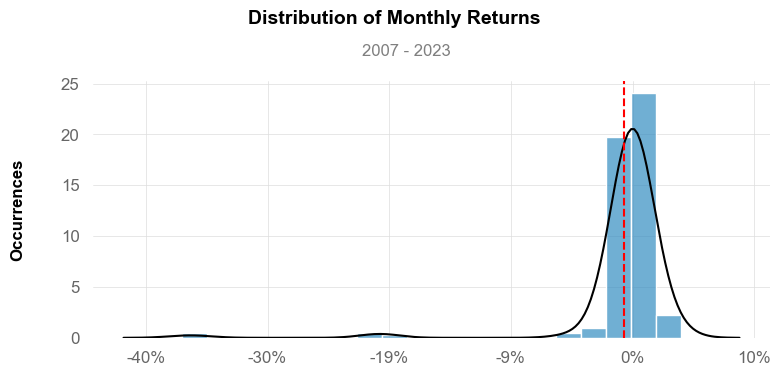

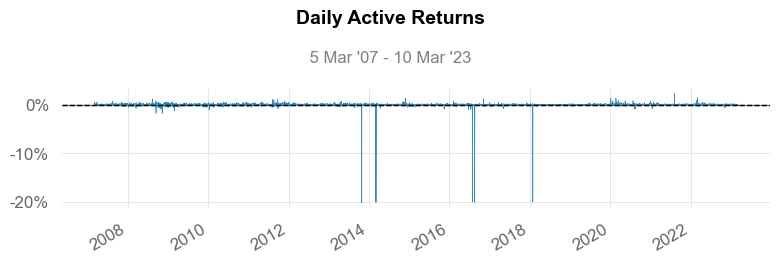

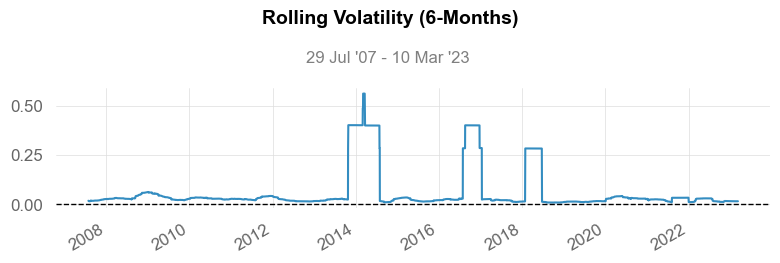

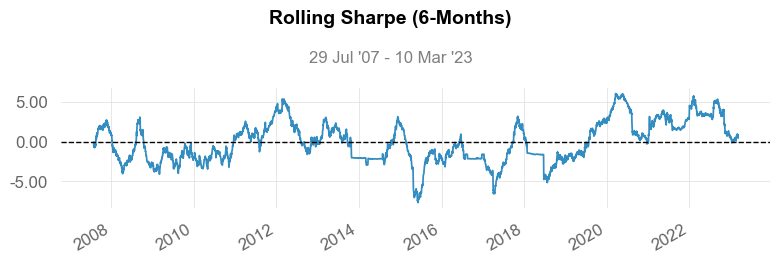

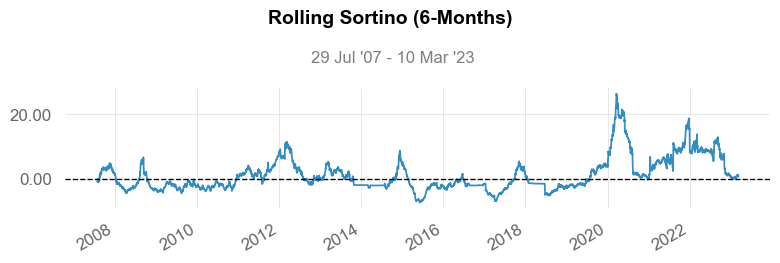

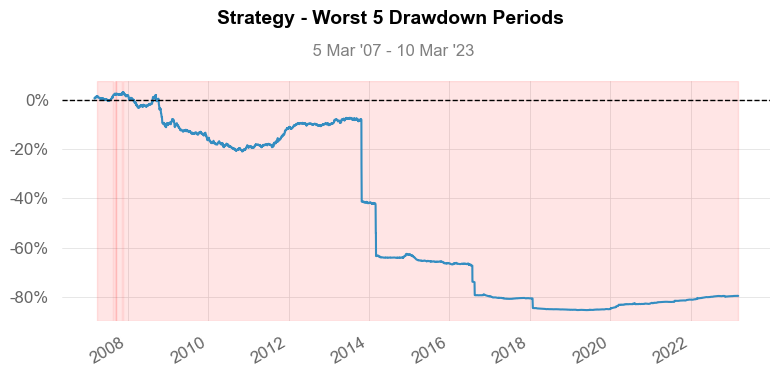

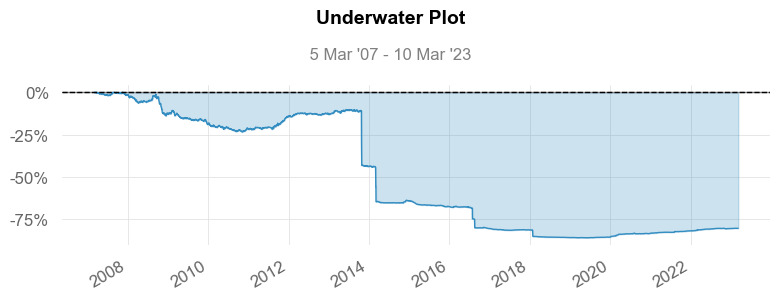

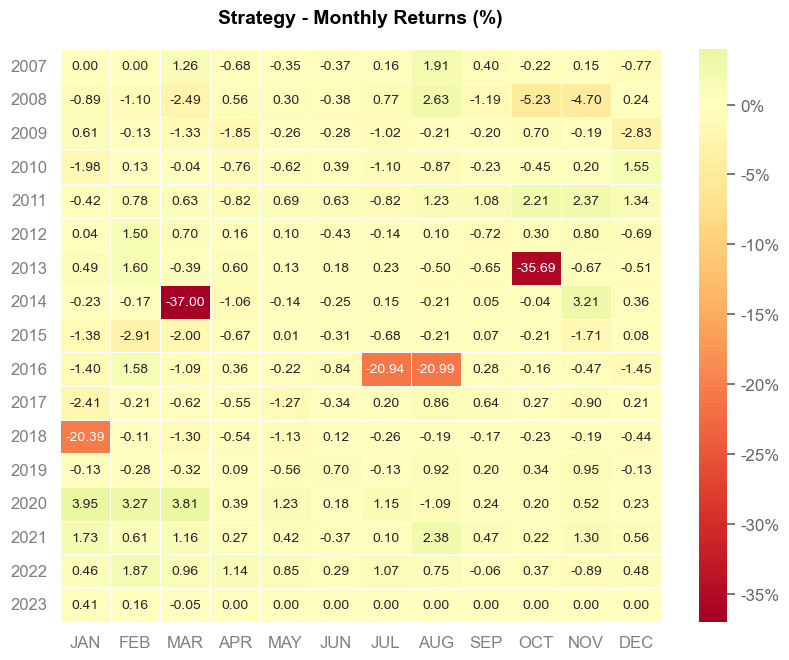

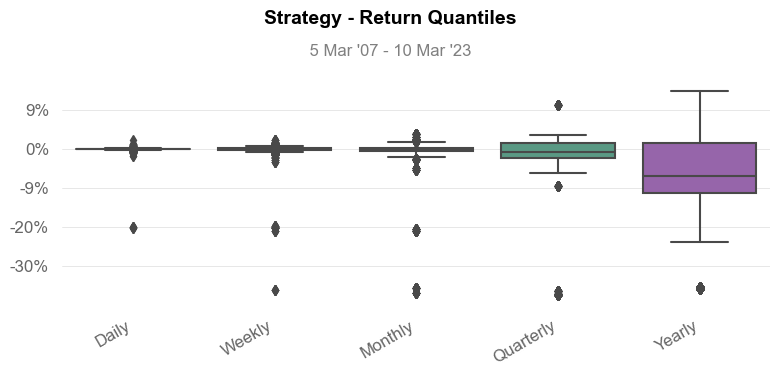

In [37]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())

## TF H30

In [38]:
TF = 'M30'

In [39]:
data_1 = XAUUSD[TF]

In [40]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

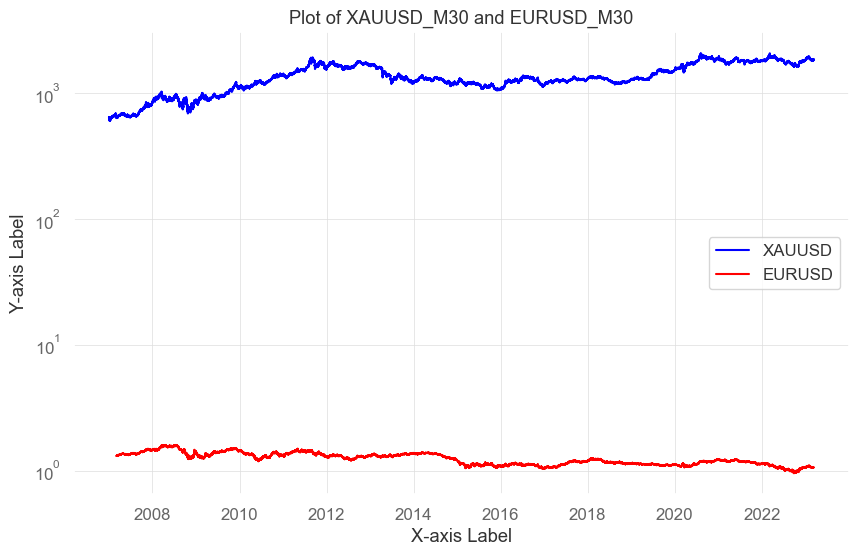

In [41]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label='XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [42]:
KF = Kalman_Filter(data_1, data_2)

In [43]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                          2.076e+06
Date:                Sat, 02 Mar 2024   Prob (F-statistic):                        0.00
Time:                        17:56:16   Log-Likelihood:                     -1.4879e+06
No. Observations:              200000   AIC:                                  2.976e+06
Df Residuals:                  199999   BIC:                                  2.976e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1061.4459      0.737   1440.895      0.000    1060.002    1062.890
==============================================================================
Omnibus:                     6380.597   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4557.850
Skew:                          -0.267   Prob(JB):                         0.00
Kurtosis:                       2.489   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
result = KF.Run()

### Save Result Backtest 

In [45]:
result
data = result[['strategy', 'stock1_signal', 'stock2_signal']].copy()

In [46]:
filename = f'{Currency_Pair}_{TF}.csv'

In [47]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-05
End Period                 2023-03-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -85.4%
CAGR﹪                     -7.95%

Sharpe                     -0.63
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -0.51
Sortino                    -0.63
Smart Sortino              -0.51
Sortino/√2                 -0.45
Smart Sortino/√2           -0.36
Omega                      0.52

Max Drawdown               -87.28%
Longest DD Days            5294
Volatility (ann.)          13.61%
Calmar                     -0.09
Skew                       -22.96
Kurtosis                   534.43

Expected Daily %           -0.04%
Expected Monthly %         -0.99%
Expected Yearly %          -10.7%
Kelly Criterion            -46.58%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.44%
Expected Shortfall (cVaR)  -1.44%

Max Consecu

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2008-09-11,2019-01-04,2023-03-10,5294,-87.279522,-87.231799
2,2007-12-28,2008-04-07,2008-09-09,257,-2.940445,-2.880000
3,2007-03-15,2007-04-23,2007-07-01,109,-1.009000,-0.929157
4,2007-09-07,2007-09-25,2007-10-07,31,-0.547079,-0.535983
5,2007-11-26,2007-12-11,2007-12-17,22,-0.514445,-0.472004


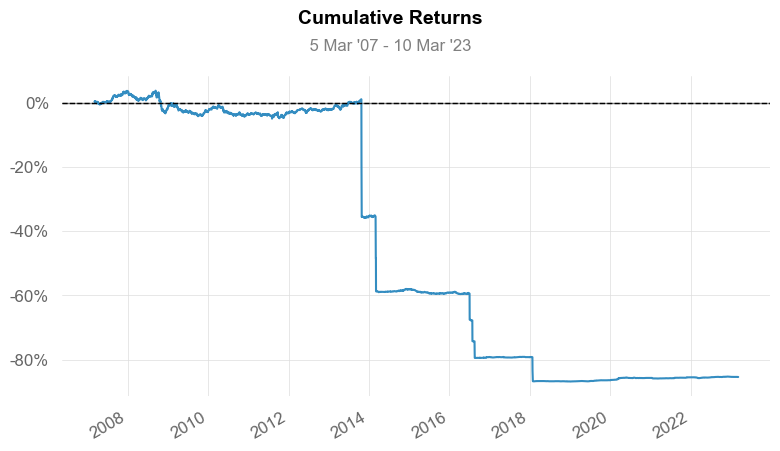

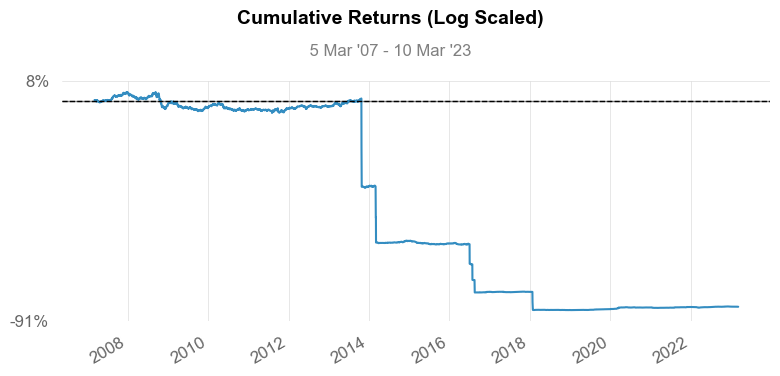

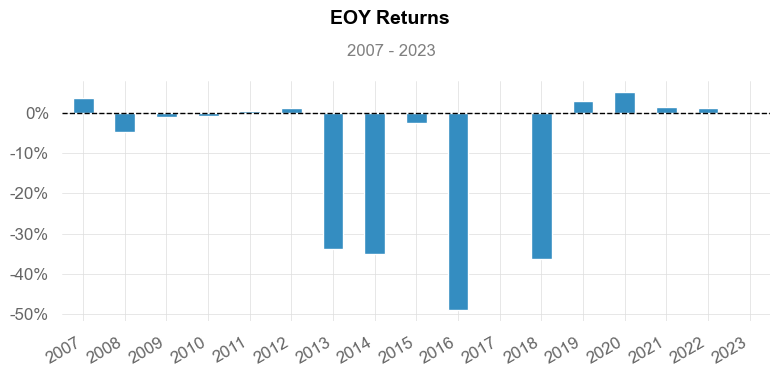

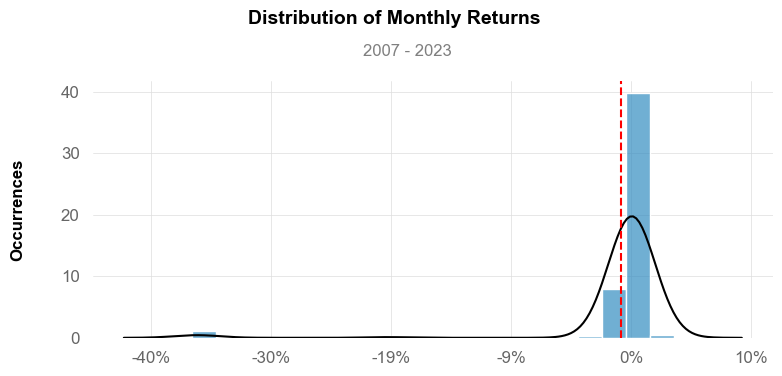

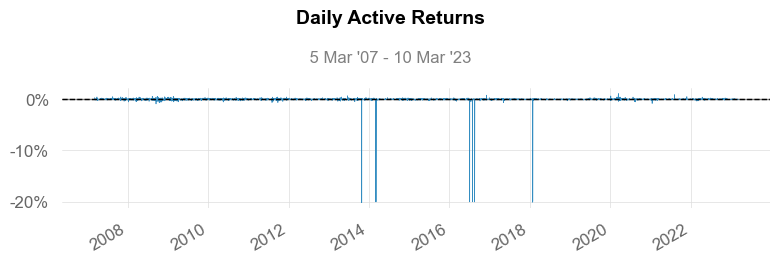

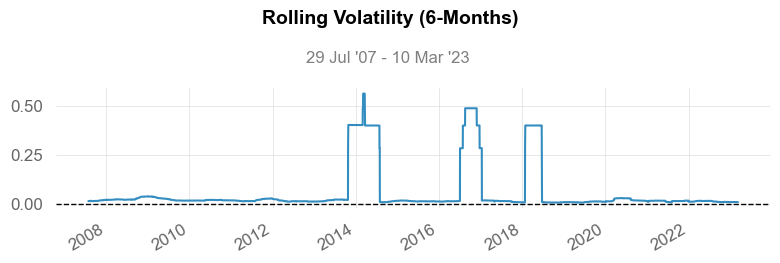

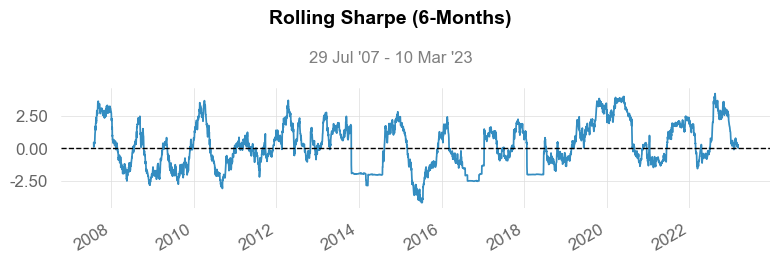

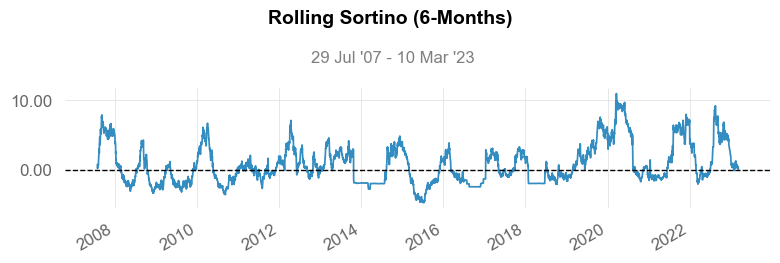

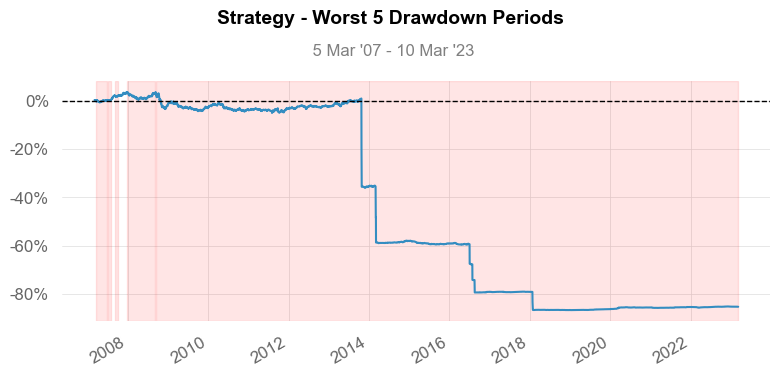

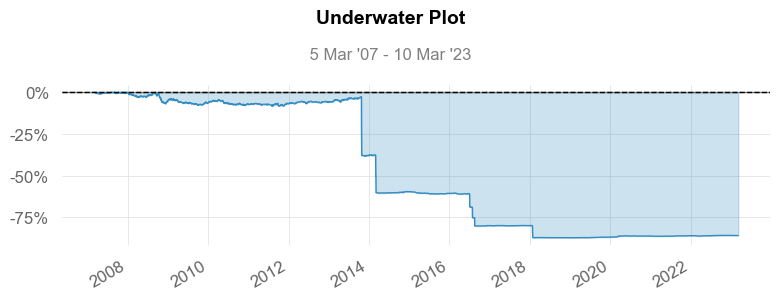

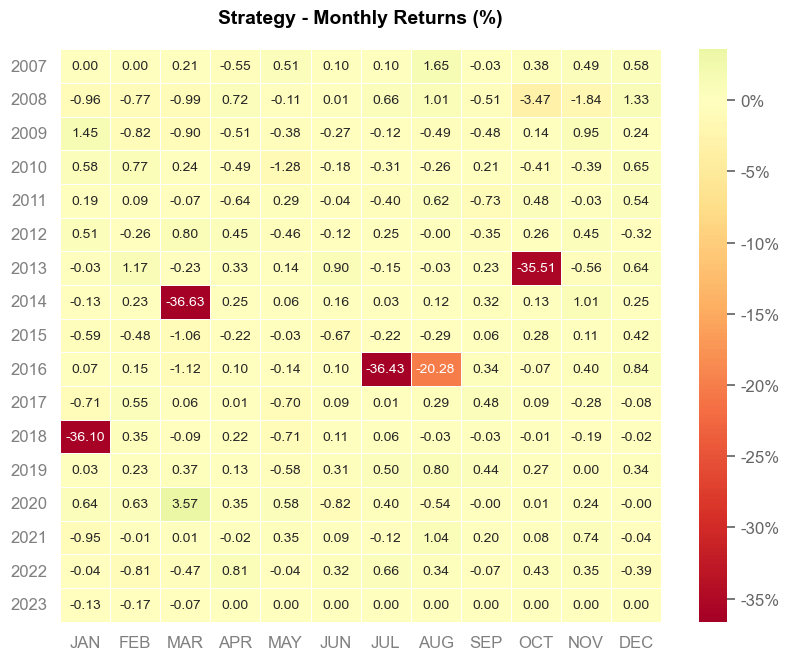

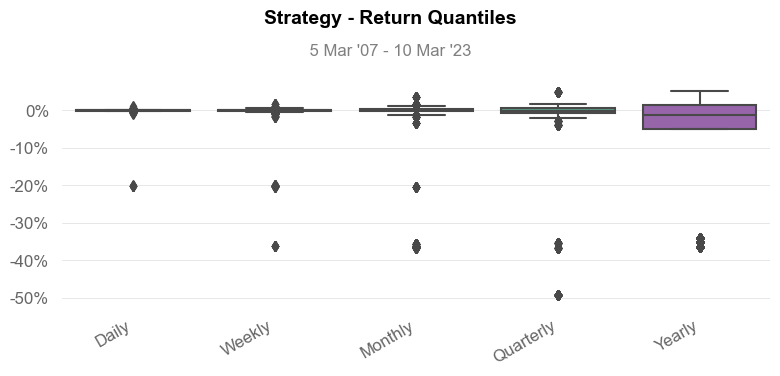

In [48]:
qs.reports.full(result['returns_all'].resample('D').last().dropna())